# Install packages

In [1]:
install.packages("corrplot")

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [10]:
install.packages("car")

also installing the dependencies ‘zip’, ‘SparseM’, ‘MatrixModels’, ‘sp’, ‘openxlsx’, ‘minqa’, ‘nloptr’, ‘RcppEigen’, ‘carData’, ‘abind’, ‘pbkrtest’, ‘quantreg’, ‘maptools’, ‘rio’, ‘lme4’

Warning message in install.packages("car"):
“installation of package ‘zip’ had non-zero exit status”Warning message in install.packages("car"):
“installation of package ‘nloptr’ had non-zero exit status”Warning message in install.packages("car"):
“installation of package ‘openxlsx’ had non-zero exit status”Warning message in install.packages("car"):
“installation of package ‘lme4’ had non-zero exit status”Warning message in install.packages("car"):
“installation of package ‘pbkrtest’ had non-zero exit status”Warning message in install.packages("car"):
“installation of package ‘rio’ had non-zero exit status”Warning message in install.packages("car"):
“installation of package ‘car’ had non-zero exit status”Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


ERROR: Error in library(car): there is no package called ‘car’


In [11]:
library(car)

ERROR: Error in library(car): there is no package called ‘car’


# Load packages

In [2]:
library(corrplot)

corrplot 0.84 loaded


# Initial brainstorm

`crmrte`, crimes committed per person is the endogenous variable

# Data cleaning

In [3]:
data <- read.table("crime_v2.csv", header=TRUE, sep=",")
data <- na.omit(data, cols="county")  # Remove empty rows read into bottom of table
data$prbconv <- as.numeric(data$prbconv)  # Convert factor column to numeric
data = subset(data, select=-c(year))  # Drop column column with only 1 unique value
# sapply(data, class)  # Double check data types

# EDA

Notes:
1. Need to determine which variables we think have the biggest causal effect (rank)
2. For these variables, look at scatter plots and transform as necessary (e.g., log, square)
  * Look at outliers to see if include or exclude
3. Run model

Variables:
1. Density, pctymle, polpc

2. wcon, wcon, wtuc, wtrd, wfir, wser, wmfg, wfed, wsta, wloc, prbarr, taxpc

3. pctmin80, prbconv, prbpris, prbconv, prbpris, avgsen, west, central

4. Urban - EXCLUDE because fully covered by desnity (dummy vairable defined by desnity and inclusion in SMSA, which is technically a random designation)
4. COUNTY
4. YEAR
4. mix


TO DO:
* REMOVE THE OUTLIER FROM THE SERVICES WAGES COLUMN
* CHECK EACH SCATTER PLOT FOR OUTLIERS TO SEE IF WANT TO INCLUDE OR EXCLUDE
* LOG, SQRT, SQUARE, EXP to transform

__One model with only the explanatory variables of key interest (possibly transformed, as determined by your EDA), and no other covariates.

One model that includes key explanatory variables and only covariates that you believe increase the accuracy of your results without introducing substantial bias (for example, you should not include outcome variables that will absorb some of the causal effect you are interested in). This model should strike a balance between accuracy and parsimony and reflect your best understanding of the determinants of crime.

One model that includes the previous covariates, and most, if not all, other covariates. A key purpose of this model is to demonstrate the robustness of your results to model specification

In [34]:
summary(lm(crmrte ~ crmrte, data=data))

Warning message in model.matrix.default(mt, mf, contrasts):
“the response appeared on the right-hand side and was dropped”Warning message in model.matrix.default(mt, mf, contrasts):
“problem with term 1 in model.matrix: no columns are assigned”


Call:
lm(formula = crmrte ~ crmrte, data = data)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.027867 -0.012473 -0.003415  0.006241  0.065566 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 0.033400   0.001972   16.94   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.01881 on 90 degrees of freedom


In [57]:
mean(data$polpc)

[1] 0.001702159

In [56]:
max(data$polpc)

[1] 0.00905433

In [52]:
cor(data[c('crmrte', 'taxpc', 'polpc')])

,crmrte,taxpc,polpc
crmrte,1.0000000,0.4509798,0.1698849
taxpc,0.4509798,1.0000000,0.2836157
polpc,0.1698849,0.2836157,1.0000000


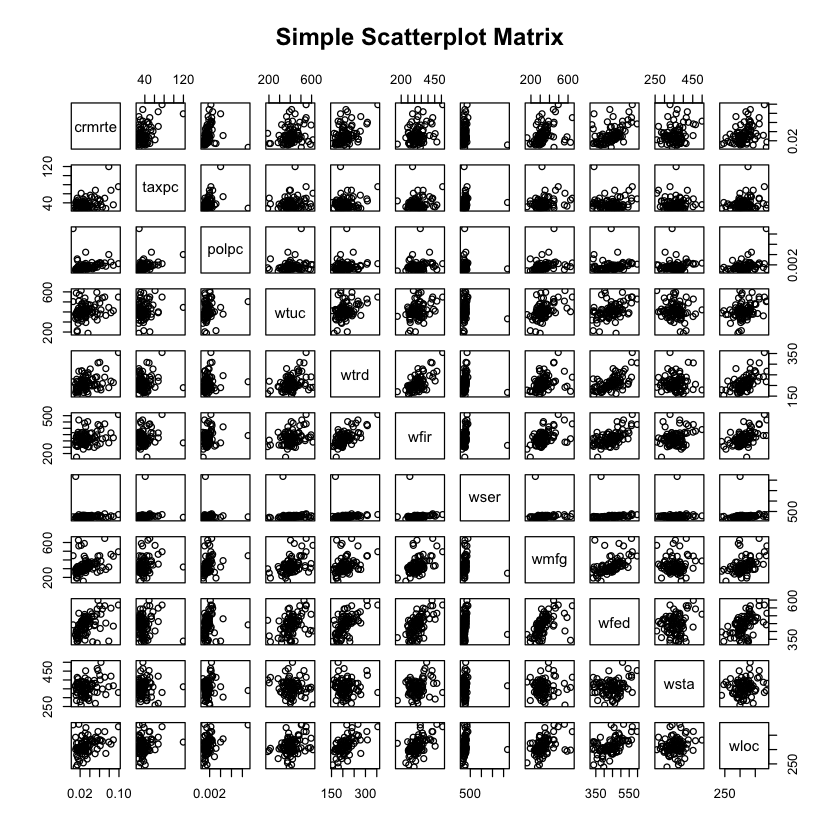

In [51]:
pairs(~crmrte + taxpc + polpc + wtuc + wtrd + wfir + wser + wmfg + wfed + wsta + wloc,data=data,
   main="Simple Scatterplot Matrix")

,county,crmrte,prbarr,prbconv,prbpris,avgsen,polpc,density,taxpc,west,...,wtuc,wtrd,wfir,wser,wmfg,wfed,wsta,wloc,mix,pctymle
county,1.000000000,0.01131013,-0.01935153,0.075635717,-0.072709805,0.01072730,0.06723391,-0.03153617,-0.07534548,0.03626055,...,0.030212934,0.013212398,0.038588306,0.139599977,-0.047961950,-0.008659538,0.106695595,0.07787351,-0.06411729,0.095839084
crmrte,0.011310134,1.00000000,-0.39332974,-0.398228521,0.046984278,0.02741132,0.16988485,0.72896316,0.45097978,-0.34938461,...,0.229357560,0.410105585,0.329611990,-0.052568836,0.354288005,0.486155765,0.201991289,0.34843532,-0.13042871,0.291248491
prbarr,-0.019351528,-0.39332974,1.00000000,-0.075392928,0.045441890,0.18001477,0.42644092,-0.30138532,-0.13501969,0.16673500,...,-0.072128771,-0.101838860,-0.173762086,-0.131526923,-0.151876293,-0.208669516,-0.161229976,-0.02727041,0.41321102,-0.180269195
prbconv,0.075635717,-0.39822852,-0.07539293,1.000000000,0.037715591,0.03134689,-0.02781855,-0.29548480,-0.27892799,0.01541320,...,0.006444062,-0.130703444,0.050512911,0.170075348,0.061605221,0.018756100,-0.113448475,0.03437167,-0.33241442,-0.226625243
prbpris,-0.072709805,0.04698428,0.04544189,0.037715591,1.000000000,-0.09607929,0.04718530,0.07656438,-0.09336370,-0.04084976,...,0.125732287,0.140086766,0.034067883,0.038178712,0.008590339,0.085620047,-0.031980764,0.08269815,0.11613960,-0.083157977
avgsen,0.010727296,0.02741132,0.18001477,0.031346885,-0.096079288,1.00000000,0.49043580,0.07838791,0.09632028,0.08317835,...,0.214590132,0.080647962,0.163621016,-0.150995893,0.116021950,0.144378311,0.133787438,0.12388542,-0.13687970,0.073961753
polpc,0.067233912,0.16988485,0.42644092,-0.027818550,0.047185296,0.49043580,1.00000000,0.16112906,0.28361567,0.13846874,...,0.166453968,0.111820841,0.189477547,-0.016947344,0.272404410,0.158919336,0.051494258,0.37521273,0.02541011,0.051598099
density,-0.031536167,0.72896316,-0.30138532,-0.295484797,0.076564378,0.07838791,0.16112906,1.00000000,0.32217431,-0.14126671,...,0.328750888,0.577537292,0.540680532,0.043410263,0.440677008,0.585787038,0.222452602,0.44935488,-0.13569967,0.116213908
taxpc,-0.075345483,0.45097978,-0.13501969,-0.278927987,-0.093363699,0.09632028,0.28361567,0.32217431,1.00000000,-0.19467439,...,0.162755036,0.166899227,0.123560472,0.074907194,0.261261779,0.058342289,-0.031109414,0.20676211,-0.04156935,-0.089212589
west,0.036260550,-0.34938461,0.16673500,0.015413201,-0.040849757,0.08317835,0.13846874,-0.14126671,-0.19467439,1.00000000,...,0.098678447,-0.128507253,-0.023252605,-0.056967840,-0.012417552,-0.167055035,-0.083844170,-0.08792384,-0.01204112,-0.044840286


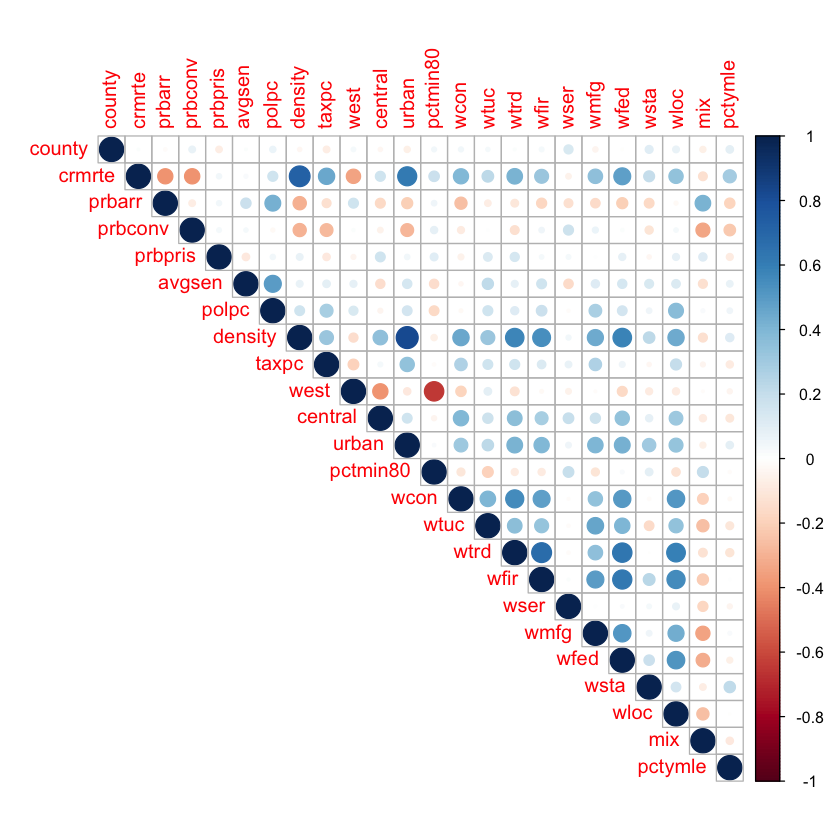

$r
         prbconv   west avgsen  polpc prbarr    mix prbpris pctmin80  county
prbconv        1                                                            
west       0.015      1                                                     
avgsen     0.031  0.083      1                                              
polpc     -0.028   0.14   0.49      1                                       
prbarr    -0.075   0.17   0.18   0.43      1                                
mix        -0.33 -0.012  -0.14  0.025   0.41      1                         
prbpris    0.038 -0.041 -0.096  0.047  0.045   0.12       1                 
pctmin80   0.088  -0.64  -0.15  -0.16  0.051    0.2     0.1        1        
county     0.076  0.036  0.011  0.067 -0.019 -0.064  -0.073    0.041       1
wsta       -0.11 -0.084   0.13  0.051  -0.16 -0.074  -0.032    0.098    0.11
pctymle    -0.23 -0.045  0.074  0.052  -0.18 -0.092  -0.083   -0.016   0.096
central   -0.053   -0.4  -0.14 -0.041  -0.17  -0.09    0.16   -0.044  -0.

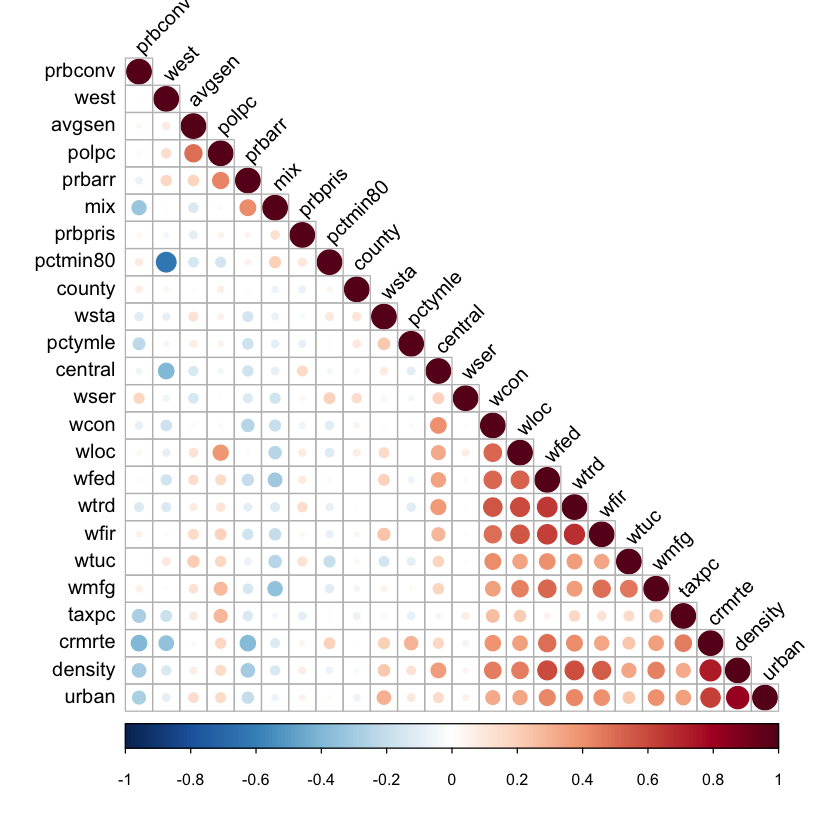

In [4]:
correlations <- cor(data)
correlations
corrplot(correlations, type="upper", method='circle')

source("http://www.sthda.com/upload/rquery_cormat.r")
require("corrplot")
rquery.cormat(data)

Want to include features correlated with `crmrte` but not correlated with each other. 

See that there are many groups of features that are correlated with each other, e.g.,:
* `density`, `wcon`, `wtuc`, `wtrd`, `wfir`, `wmfg`, `wfed`, `wsta`, `wloc` as higher paying jobs are often found in cities
* `pbarr`, `polpc`, `avgsen` as the more police there are, the higher the chance of being arrested.  The average sentence length may be related as counties with more police officers may be "harder on crime" as well

Out of these groups of features, we want to choose ones that are:
1. Correlated with `crmrte`
2. Potentially able to cause higher/lower crime rates or be a metric that we can directly impact through policy (rather than simply related to crime)

Initial list: `density`, `polpc`, `pctymle`

# Modeling

## Baseline model

In [5]:
baseline_model = lm(crmrte ~ density + polpc + pctymle, data=data)
summary(baseline_model)


Call:
lm(formula = crmrte ~ density + polpc + pctymle, data = data)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.023479 -0.008094 -0.002242  0.005199  0.052813 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 0.0054372  0.0053140   1.023  0.30905    
density     0.0086606  0.0008831   9.807    1e-15 ***
polpc       0.8922117  1.3477221   0.662  0.50971    
pctymle     0.1675727  0.0566615   2.957  0.00399 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.01245 on 87 degrees of freedom
Multiple R-squared:  0.5768,	Adjusted R-squared:  0.5622 
F-statistic: 39.52 on 3 and 87 DF,  p-value: 3.281e-16


In [6]:
baseline_econ_model = lm(crmrte ~ wcon + wloc + wfed + wtrd + wmfg + taxpc + pctymle, data=data)
summary(baseline_econ_model)


Call:
lm(formula = crmrte ~ wcon + wloc + wfed + wtrd + wmfg + taxpc + 
    pctymle, data = data)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.028422 -0.007320 -0.002878  0.006666  0.041228 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -8.309e-02  1.699e-02  -4.890 4.86e-06 ***
wcon         1.162e-05  3.776e-05   0.308 0.759035    
wloc        -2.534e-05  6.573e-05  -0.386 0.700817    
wfed         1.334e-04  3.417e-05   3.905 0.000191 ***
wtrd         6.774e-05  5.939e-05   1.141 0.257263    
wmfg        -5.817e-06  1.948e-05  -0.299 0.765978    
taxpc        6.417e-04  1.145e-04   5.605 2.65e-07 ***
pctymle      3.000e-01  6.009e-02   4.993 3.23e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.01307 on 83 degrees of freedom
Multiple R-squared:  0.5546,	Adjusted R-squared:  0.517 
F-statistic: 14.76 on 7 and 83 DF,  p-value: 2.363e-12


In [7]:
install.packages("stargazer")
library(stargazer)
stargazer(baseline_econ_model, baseline_model, type = "text", title="Descriptive statistics", digits=1, out="table1.txt")


Updating HTML index of packages in '.Library'
Making 'packages.html' ... done

Please cite as: 

 Hlavac, Marek (2018). stargazer: Well-Formatted Regression and Summary Statistics Tables.
 R package version 5.2.2. https://CRAN.R-project.org/package=stargazer 




Descriptive statistics
                               Dependent variable:           
                    -----------------------------------------
                                     crmrte                  
                            (1)                  (2)         
-------------------------------------------------------------
wcon                       0.000                             
                          (0.000)                            
                                                             
wloc                       -0.000                            
                          (0.000)                            
                                                             
wfed                      0.000***                           
                          (0.000)                            
                                                             
wtrd                       0.000                             
                          (0.000)             